<a href="https://colab.research.google.com/github/Baraa710/Premier_League_Predictor/blob/main/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler




In [ ]:
# Read the Excel file
df = pd.read_excel("/content/drive/MyDrive/APS360_Project/Match_Data/FinalMatchData.xlsx")

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,Wk,winner,home wins,away wins,home games,away games,predicted_winner,Age_home_player_2,MP_home_player_2,Min_home_player_2,...,PK_away,PKatt_away,CrdY_away,CrdR_away,GA_away,SoTA_away,Saves_away,CS_away,SoT_away,PremierLeague_away
0,1,0,0,0,0,0,2,24.0,32.0,2685.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0,0,0,0,2,31.0,14.0,897.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0,0,0,0,2,28.0,38.0,3420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,0,0,0,0,2,19.0,21.0,1541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0,0,0,0,2,21.0,31.0,2651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,38,0,7,11,37,37,1,29.0,38.0,3420.0,...,4.0,5.0,99.0,5.0,39.0,153.0,117.0,21.0,204.0,0.0
6455,38,0,8,11,37,37,1,24.0,31.0,2786.0,...,4.0,6.0,52.0,3.0,51.0,165.0,113.0,8.0,142.0,1.0
6456,38,0,17,18,37,37,1,24.0,26.0,1820.0,...,4.0,7.0,72.0,2.0,44.0,146.0,102.0,11.0,141.0,1.0
6457,38,1,7,17,37,37,1,30.0,29.0,2054.0,...,5.0,5.0,69.0,1.0,40.0,137.0,98.0,16.0,185.0,1.0


In [ ]:
print(df.shape)

(6459, 247)


In [ ]:
print(df.iloc[:,:])

      Wk  winner  home wins  away wins  home games  away games  \
0      1       0          0          0           0           0   
1      1       0          0          0           0           0   
2      1       0          0          0           0           0   
3      1       2          0          0           0           0   
4      1       0          0          0           0           0   
...   ..     ...        ...        ...         ...         ...   
6454  38       0          7         11          37          37   
6455  38       0          8         11          37          37   
6456  38       0         17         18          37          37   
6457  38       1          7         17          37          37   
6458  38       0         14         28          37          37   

      predicted_winner  Age_home_player_2  MP_home_player_2  \
0                    2               24.0              32.0   
1                    2               31.0              14.0   
2                 

In [ ]:
# Assuming 'winner_indices' is the column name for labels
labels = df['winner'].values

# Drop the label column to get features
features = df.drop(columns=['winner']).values

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(features)

# Convert to PyTorch tensors
features_tensor = torch.tensor(normalized_features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)

features_tensor[torch.isnan(features_tensor)] = 0

In [ ]:
print(features_tensor)
print(features_tensor.shape)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0000, 0.5667, 0.5806,  ..., 0.3913, 0.1687, 1.0000],
        [1.0000, 0.2333, 0.5484,  ..., 0.6087, 0.3454, 1.0000],
        [1.0000, 0.4667, 0.9032,  ..., 0.8261, 0.5542, 1.0000]])
torch.Size([6459, 246])


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_features, rem_features, train_labels, rem_labels = train_test_split(features_tensor, labels_tensor, test_size=0.3, random_state=50)

# Further split the training set into training and validation sets
val_features, test_features, val_labels, test_labels = train_test_split(rem_features, rem_labels, test_size=0.6, random_state=50)

train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2,hidden_size3,hidden_size4,hidden_size5, hidden_size6,hidden_size7, hidden_size8, hidden_size9, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1,hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, hidden_size5)
        self.fc6 = nn.Linear(hidden_size5, hidden_size6)
        self.fc7 = nn.Linear(hidden_size6, hidden_size7)
        self.fc8 = nn.Linear(hidden_size7, hidden_size8)
        self.fc9 = nn.Linear(hidden_size8, hidden_size9)
        self.fc10 = nn.Linear(hidden_size9, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        out = F.relu(out)
        out = self.fc4(out)
        out = F.relu(out)
        out = self.fc5(out)
        out = F.relu(out)
        out = self.fc6(out)
        out = F.relu(out)
        out = self.fc7(out)
        out = F.relu(out)
        out = self.fc8(out)
        out = F.relu(out)
        out = self.fc9(out)
        out = F.relu(out)
        out = self.fc10(out)

        return out

In [ ]:
!pip install torchviz
from torchviz import make_dot


In [ ]:
!pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
input_size = features_tensor.shape[1]
hidden_size1 = 150
hidden_size2 = 130
hidden_size3 = 90
hidden_size4 = 60
hidden_size5 = 40
hidden_size6 = 60
hidden_size7 = 90
hidden_size8 = 130
hidden_size9 = 150

batch_size=64
num_classes = 3
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3,hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, hidden_size9, num_classes)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# Assuming you have defined your train DataLoader

batch = next(iter(train_loader))
yhat = model(batch[0]) # Give dummy batch to forward().
make_dot(yhat, params=dict(list(model.named_parameters()))).render("ann_torchviz", format="png")

'ann_torchviz.png'

In [ ]:
pip install --upgrade torch hiddenlayer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 812.6 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.
torchtext 0.17.1 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.
torchvision 0.17.1+cu121 requires torch==2.2.1, but you have torch 2.2.2 which is incompatible.


In [ ]:
input_size = features_tensor.shape[1]
hidden_sizes = [150, 130, 90, 60, 40, 60, 90, 130, 150]
num_classes = 3

# Create an instance of the model
model = NeuralNetwork(input_size, *hidden_sizes, num_classes)

# Visualize the model
graph = hl.build_graph(model, torch.zeros([1, input_size]))
graph.theme = hl.graph.THEMES["blue"].copy()
graph.save("graph.png")  # Save the visualization to a file

AttributeError: module 'torch.onnx' has no attribute '_optimize_trace'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import random
def train_with_early_stopping(model, train_dataset, val_dataset, batch_size=64, num_epochs=1, print_stat=1, learning_rate=0.05, mm=0, patience=5):
    random.seed(42)
    # Create data loaders for training and validation sets
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), weight_decay=mm)

    iters, losses, train_acc, val_acc = [], [], [], []

    best_val_acc = 0.0
    counter = 0  # Counter to track the number of epochs without improvement
    best_model_state = None

    for epoch in range(num_epochs):
        curr_loss = 0
        ii = 0
        for imgs, labels in train_loader:
            out = model(imgs)  # Forward pass
            loss = criterion(out, labels)  # Compute loss
            loss.backward()  # Backward pass (compute parameter updates)
            optimizer.step()  # Update parameters
            optimizer.zero_grad()  # Zero the gradients
            curr_loss += loss.item()  # Accumulate loss
            ii += 1

        # Calculate average training loss
        avg_train_loss = curr_loss / ii

        # Calculate training and validation accuracy
        train_accuracy = get_accuracy_patience(model, train_loader)
        val_accuracy = get_accuracy_patience(model, val_loader)

        # Save training and validation metrics
        iters.append(epoch)
        losses.append(avg_train_loss)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)

        # Print training and validation stats
        if print_stat:
            print("Epoch %s: Training Accuracy: %s || Validation Accuracy: %s" % (epoch, train_accuracy, val_accuracy))

        # Check for improvement in validation accuracy
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            counter = 0
            best_model_state = model.state_dict()
        else:
            counter += 1

        # Check early stopping condition
        if counter >= patience:
            print(f"Stopping early at epoch {epoch} as validation accuracy did not improve for {patience} epochs.")
            break

    # Load the best model state
    if best_model_state:
        model.load_state_dict(best_model_state)

    validation_accuracy = val_acc[-1]
    if validation_accuracy > 0.53:
      # Define the directory to save the model
      save_dir = "/content/drive/MyDrive/APS360_Project/Models"

      # Create the directory if it doesn't exist
      if not os.path.exists(save_dir):
          os.makedirs(save_dir)


    # Plot training curve
      plt.title("Training Curve")
      plt.plot(iters, losses, label="Train")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

      plt.title("Training Curve")
      plt.plot(iters, train_acc, label="Train")
      plt.plot(iters, val_acc, label="Validation")
      plt.xlabel("Epochs")
      plt.ylabel("Accuracy")
      plt.legend(loc='best')
      plt.show()

      print("Final Training Accuracy: {}".format(train_acc[-1]))
      print("Final Validation Accuracy: {}".format(val_acc[-1]))

    return train_acc[-1], val_acc[-1]

def get_accuracy_patience(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in data_loader:
            outputs = model(imgs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
# Train the model
def train(model, dataset, batch_size=64, num_epochs=1 , print_stat = 1, learning_rate=0.05, mm = 0.9):

    # Create a data loader from the custom dataset
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9,0.999))

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        curr_loss = 0
        ii = 0
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            curr_loss += float(loss/batch_size)      # compute *average* loss
            ii+=1

        # save the current training information
        iters.append(n)
        losses.append(curr_loss/ii)
        train_acc.append(get_accuracy(model, batch_size, train=True)) # compute training accuracy
        val_acc.append(get_accuracy(model, batch_size, train=False))  # compute validation accuracy
        n += 1
        print("Epoch %s: Training Accuracy: %s || Validation Accuracy: %s" % (epoch, train_acc[n-1], val_acc[n-1]))


    if print_stat:
      # plotting
      plt.title("Training Curve")
      plt.plot(iters, losses, label="Train")
      plt.xlabel("Iterations")
      plt.ylabel("Loss")
      plt.show()

      plt.title("Training Curve")
      plt.plot(iters, train_acc, label="Train")
      plt.plot(iters, val_acc, label="Validation")
      plt.xlabel("Iterations")
      plt.ylabel("Training Accuracy")
      plt.legend(loc='best')
      plt.show()

      print("Final Training Accuracy: {}".format(train_acc[-1]))
      print("Final Validation Accuracy: {}".format(val_acc[-1]))

      return train_acc[-1], val_acc[-1]

def get_accuracy(model, batch_size = 64, train=False, test = False):
    if train:
        data = train_dataset
    elif test:
        data = test_dataset
    else:
        data = val_dataset

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

print ('done')

done


246

Epoch 0: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 1: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 2: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 3: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 4: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 5: Training Accuracy: 0.45631497456314973 || Validation Accuracy: 0.4735483870967742
Epoch 6: Training Accuracy: 0.5363857553638576 || Validation Accuracy: 0.5303225806451612
Epoch 7: Training Accuracy: 0.537712895377129 || Validation Accuracy: 0.5483870967741935
Epoch 8: Training Accuracy: 0.5343950453439504 || Validation Accuracy: 0.5341935483870968
Epoch 9: Training Accuracy: 0.5403671754036717 || Validation Accuracy: 0.5470967741935484
Epoch 10: Training Accuracy: 0.5401459854014599 || Validation Accuracy: 0.5483870967741935
Epoc

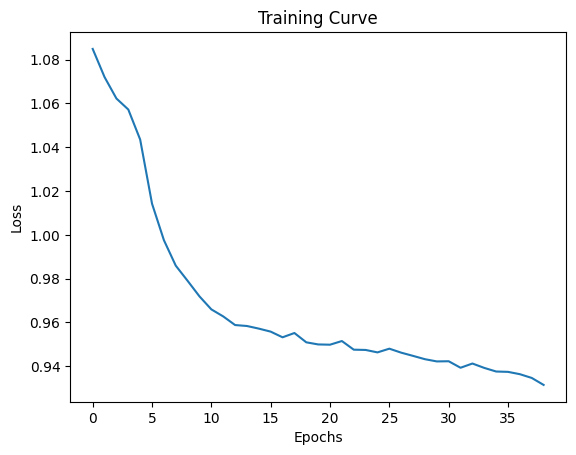

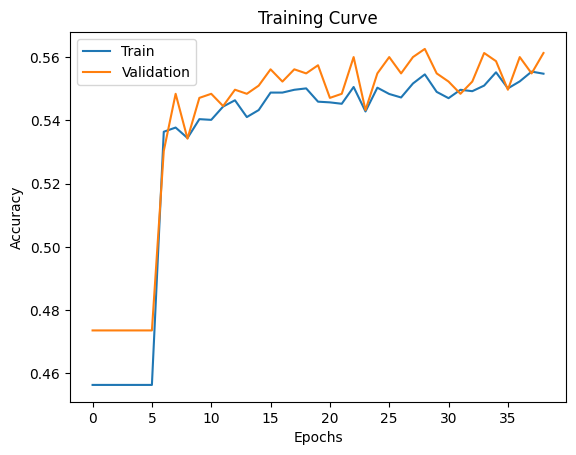

Final Training Accuracy: 0.5547445255474452
Final Validation Accuracy: 0.5612903225806452


(0.5547445255474452, 0.5612903225806452)

In [ ]:
# Instantiate the model
input_size = features_tensor.shape[1]
hidden_size1 = 150
hidden_size2 = 130
hidden_size3 = 90
hidden_size4 = 60
hidden_size5 = 40
hidden_size6 = 60
hidden_size7 = 90
hidden_size8 = 130
hidden_size9 = 150


num_classes = 3
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3,hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, hidden_size9, num_classes)
train_with_early_stopping(model = model, train_dataset=train_dataset, val_dataset=val_dataset, batch_size=64, num_epochs=40, print_stat=1, learning_rate=0.000075, patience = 10)

In [ ]:
get_accuracy(model, test=True)

0.524505588993981

In [ ]:
model_scripted = torch.jit.script(model)# Export to TorchScript

model_scripted.save('/content/drive/MyDrive/APS360_Project/Models/final_model_scripted.pt') # Save

In [ ]:
import pickle
filename = 'ANN4.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'ANN4.sav'

loaded_model = pickle.load(open(filename, 'rb'))
get_accuracy(loaded_model, train=False, test = True)

0.5424657534246575

In [ ]:
features_tensor.shape[1]


247